In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib
def nested_dict(n, type):
    if n==1:
        defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

In [59]:
data = nested_dict(4, list)
z_all= [100, 50, 10, 6, 2, 1, 0.5, 0]

data['bg']['cg_0d1'] =  np.loadtxt("./CG_ks0d1//file__background.dat")
data['bg']['cg_0d5'] =  np.loadtxt("./CG_ks0d5///file__background.dat")
data['bg']['cg_1'] =  np.loadtxt("./CG_ks1///file__background.dat")
data['bg']['qcdm'] =  np.loadtxt("./QCDM///file__background.dat")
data['bg']['lcdm'] =  np.loadtxt(".//LCDM//file__background.dat")

for z in z_all:
    index = z_all.index(z);
#     data['phi']['cg']['z='+str(z)] = np.loadtxt("./Cubic_galilan/CG/pk00"+str(index)+"_phi.dat")
    data['delta']['cg_0d01']['z='+str(z)] = np.loadtxt("./CG_ks0d01/pk00"+str(index)+"_delta.dat")
    data['delta']['cg_0d1']['z='+str(z)] = np.loadtxt("./CG_ks0d1/pk00"+str(index)+"_delta.dat")
    data['delta']['cg_0d5']['z='+str(z)] = np.loadtxt("./CG_ks0d5/pk00"+str(index)+"_delta.dat")
    data['delta']['cg_1']['z='+str(z)] = np.loadtxt("./CG_ks1//pk00"+str(index)+"_delta.dat")
    data['delta']['cg_2']['z='+str(z)] = np.loadtxt("./CG_ks2//pk00"+str(index)+"_delta.dat")
    data['delta']['qcdm']['z='+str(z)] = np.loadtxt("./QCDM/pk00"+str(index)+"_delta.dat")
    data['delta']['lcdm']['z='+str(z)] = np.loadtxt(".//LCDM/pk00"+str(index)+"_delta.dat")


## Plots:

### Background

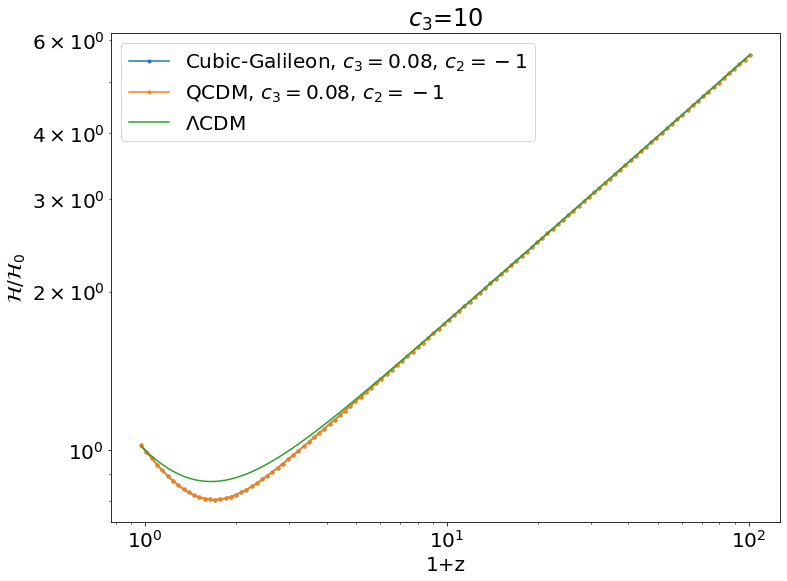

In [60]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.loglog(1./data['bg']['cg_1'][:,2], data['bg']['cg_1'][:,3], ".-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")
plt.loglog(1./data['bg']['qcdm'][:,2], data['bg']['qcdm'][:,3], ".-",  label = "QCDM, $c_3=0.08$, $c_2 = -1$")
plt.loglog(1./data['bg']['lcdm'][:,2], data['bg']['lcdm'][:,3], "-", label = "$\Lambda$CDM")


plt.title(r"$c_3 $=10")
plt.xlabel("1+z")
plt.ylabel("$\mathcal{H}/\mathcal{H}_0$")
# plt.ylim(0.001, 0.5)
# plt.xlim(0.005, 0.8)
# plt.yscale('log')
plt.legend()

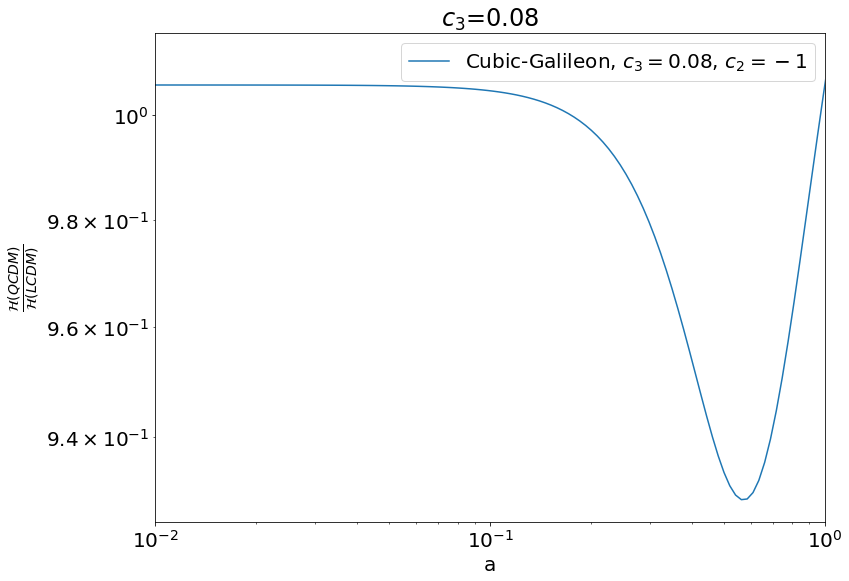

In [34]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.loglog(data['bg']['qcdm'][:,2], (data['bg']['qcdm'][:,3]*data['bg']['qcdm'][-1:,3])/(data['bg']['lcdm'][:,3]*data['bg']['lcdm'][-1:,3]), "-",  label = "Cubic-Galileon, $c_3=0.08$, $c_2 = -1$")
# plt.loglog(1./data['bg']['lcdm'][:,2], , "-", label = "$\Lambda$CDM")


plt.title(r"$c_3 $=0.08")
plt.xlabel("a")
plt.ylabel(r"$\frac{\mathcal{H}(QCDM)}{\mathcal{H}({LCDM})}$")
# plt.ylim(0.001, 0.5)
plt.xlim(0.01, 1.)
# plt.yscale('log')
plt.legend()

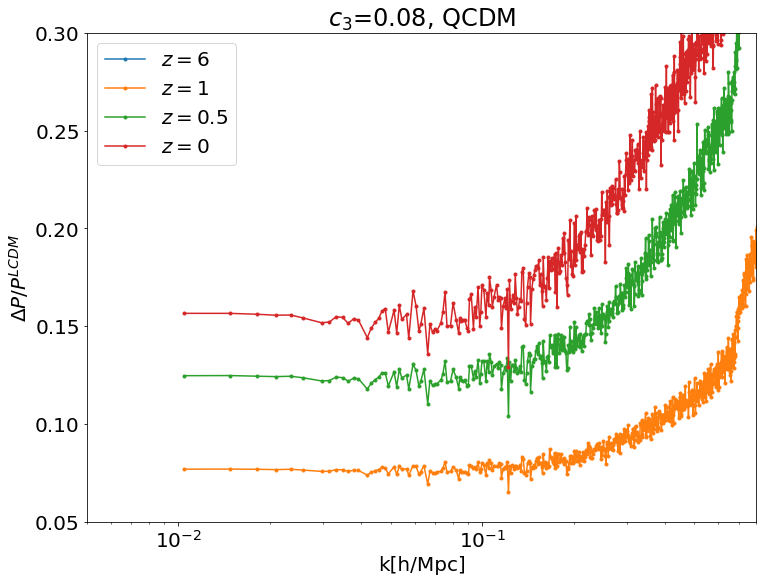

In [56]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['qcdm']['z='+str(z)][:,0]
    pk_ec = data['delta']['qcdm']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, QCDM")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(0.05, 0.3)
    plt.xlim(0.005, 0.8)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


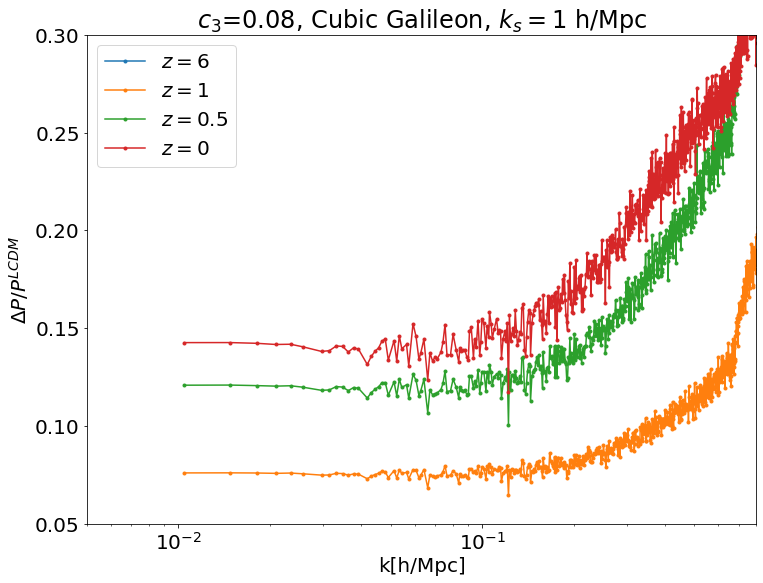

In [55]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 1$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(0.05, 0.3)
    plt.xlim(0.005, 0.8)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


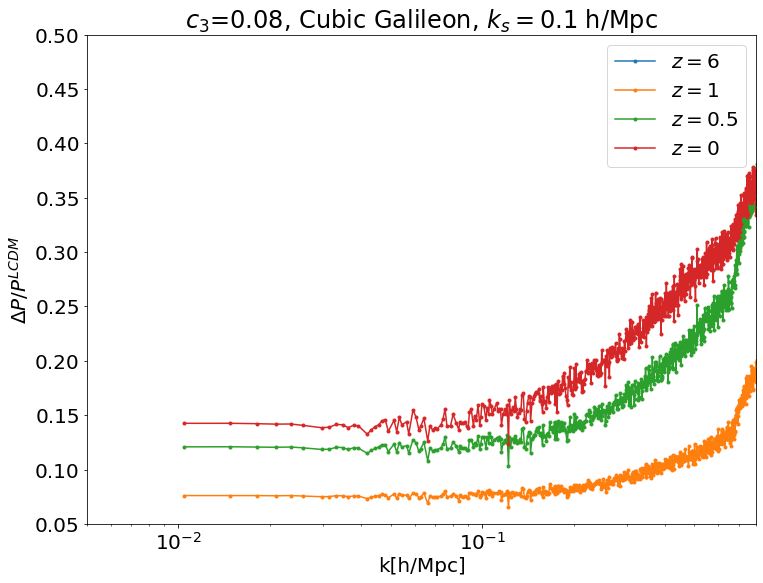

In [37]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_0d1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_0d1']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 0.1$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(0.05, 0.5)
    plt.xlim(0.005, 0.8)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


# Cubic Galileon wrt QCDM

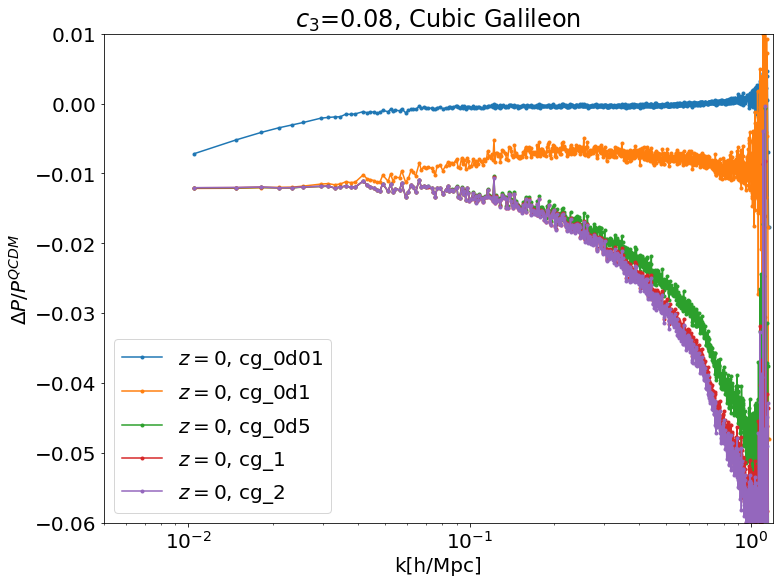

In [66]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))
colors= ["red","blue","green","magenta"]
l=0
for model in ['cg_0d01','cg_0d1', 'cg_0d5','cg_1','cg_2']:
    for z in [0]:

        k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
        p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

        k_ec = data['delta'][model]['z='+str(z)][:,0]
        pk_ec = data['delta'][model]['z='+str(z)][:,1]

        plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z)+", "+model)


        plt.title(r"$c_3 $=0.08, Cubic Galileon")
        plt.xlabel("k[h/Mpc]")
        plt.ylabel("$\Delta P/P^{QCDM}}$")
        plt.ylim(-0.06, 0.01)
        plt.xlim(0.005, 1.2)
    #     plt.yscale('log')
        plt.legend()
        l=l+1
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


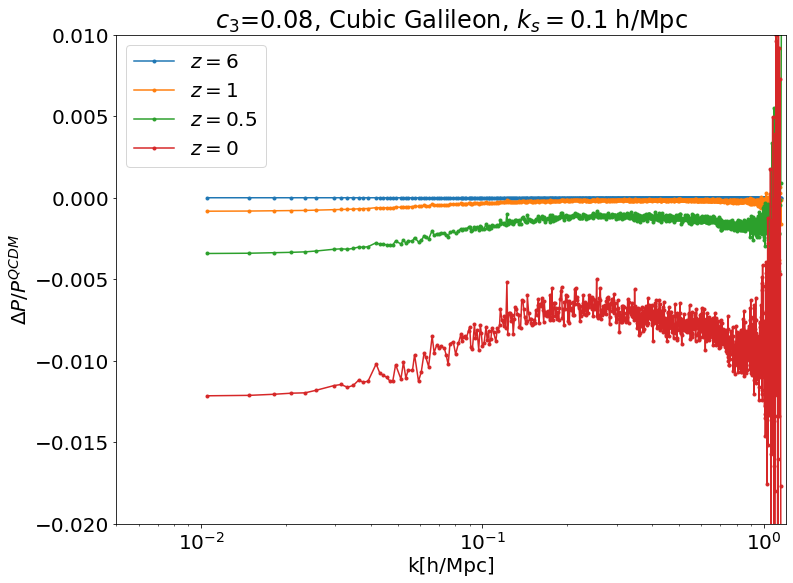

In [53]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_0d1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_0d1']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 0.1$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{QCDM}}$")
    plt.ylim(-0.02, 0.01)
    plt.xlim(0.005, 1.2)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


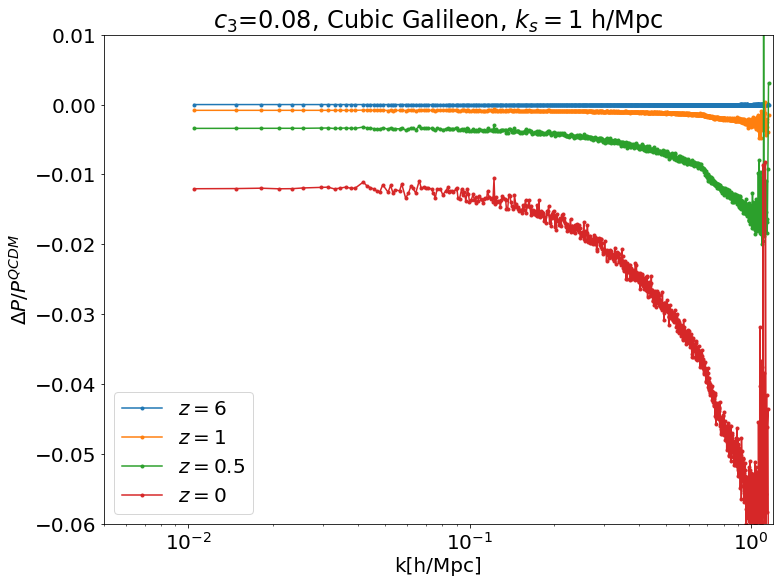

In [45]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_1']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 1$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{QCDM}}$")
    plt.ylim(-0.06, 0.01)
    plt.xlim(0.005, 1.2)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


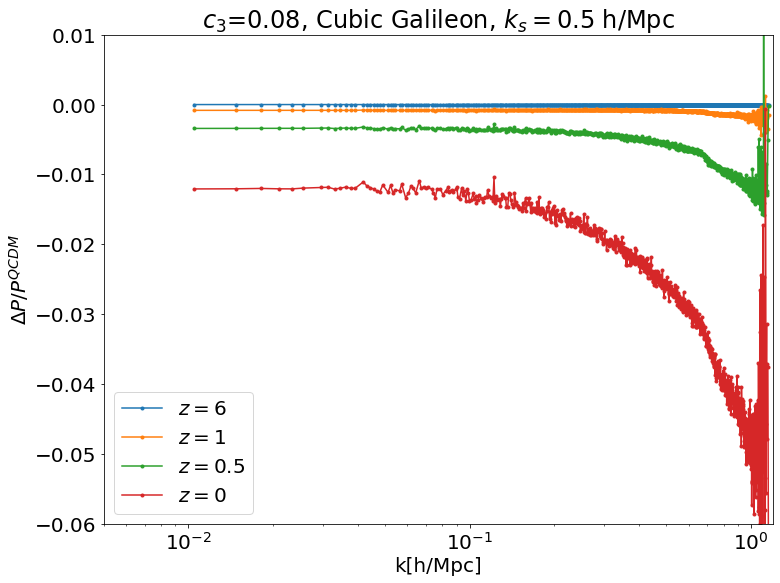

In [46]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['qcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg_0d5']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg_0d5']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=0.08, Cubic Galileon, $k_s = 0.5$ h/Mpc")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{QCDM}}$")
    plt.ylim(-0.06, 0.01)
    plt.xlim(0.005, 1.2)
#     plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


# The effect of $k_s$ parameter 

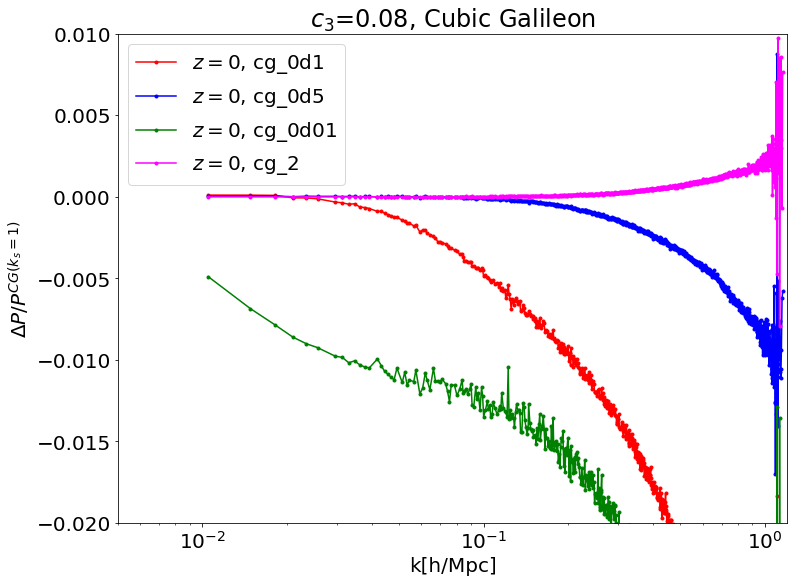

In [61]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

l=0
colors= ["red","blue","green","magenta"]
for model in ['cg_0d1', 'cg_0d5','cg_0d01','cg_2']:
    for z in [0]:

        k_ec_ref =  data['delta'][model]['z='+str(z)][:,0]
        p_ec_ref =  data['delta'][model]['z='+str(z)][:,1]

        k_ec = data['delta']['cg_1']['z='+str(z)][:,0]
        pk_ec = data['delta']['cg_1']['z='+str(z)][:,1]

        plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", color= colors[l] ,label ="$z=$"+str(z)+", "+model)


        plt.title(r"$c_3 $=0.08, Cubic Galileon")
        plt.xlabel("k[h/Mpc]")
        plt.ylabel("$\Delta P/P^{CG(k_s=1)}}$")
        plt.ylim(-0.02, 0.01)
        plt.xlim(0.005, 1.2)
    #     plt.yscale('log')
        plt.legend()
        l=l+1
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')
